In [1]:
import pandas as pd
import os

In [17]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importamos las librerias necesarias

In [18]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import missingno as msno
import math
import seaborn as sns
#import statsmodels.api as sm

Localizamos donde estan los archivos por medio de la libreria os para mayor robustez del proceso

In [2]:
current_directory = os.getcwd()
print(current_directory)

parent_directory=os.path.split(current_directory)[0]
parent_directory

c:\Users\jaime\OneDrive\Documentos\trabajo\dataknow\prueba_tecnica\punto6


'c:\\Users\\jaime\\OneDrive\\Documentos\\trabajo\\dataknow\\prueba_tecnica'

Asignamos la ruta de los archivos y los cargamos.

In [3]:
train_file = os.path.join(parent_directory,'Prueba_Tecnica','Datos3' ,'train.csv')
test_file = os.path.join(parent_directory,'Prueba_Tecnica','Datos3' ,'test.csv')

In [10]:
# Cargar los datos
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [9]:
pd.set_option('display.max_columns',None)
train_data


,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.00,17,594.77,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.00,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,622529101,1,993430.04,19,180.65,POS,20150519,US,POS,2,19,19740401.0,442.0,F,Preferencial,48.0,103918285.0,95475378.0,4,8944.83,2236.21,3646.67,4,96.86,4552.41,484.30
2961,2043206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,24,19970616.0,611.0,F,Preferencial,35.0,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2962,2943206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,24,19970616.0,611.0,F,Preferencial,35.0,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2963,3136302872,0,996191.64,15,234.42,POS,20150513,US,MCI,3,13,20000609.0,534.0,F,PYME,34.0,56666000.0,37600750.0,1,NaN,NaN,NaN,3,219.46,4552.41,1316.79


Observamos el numero de filas no nulas mediante la función info().

In [6]:
# Ver información de los datos
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

Establecemos la cantidad de nulos por cada columna y que porcentaje representan

In [37]:
#Conteo de la cantidad de nulos por cada columna
regs=train_data.shape[0]
df_transform=train_data.copy()
for col in train_data.columns:
    vals=train_data[col].value_counts()
    values=vals.shape[0]
    nas=train_data[train_data[col].isna()].shape[0]
    porcentaje_na=nas*100/regs
    if porcentaje_na>=10:
        text=f'elimienando columna: {col}'
        df_transform.drop(columns={col},inplace=True)
    else:
        text=f'Quitando nulos de {col}'
        df_transform.dropna(subset=col,inplace=True)

    print(f'-variable {col} tiene {values} valores único, {nas} valores nulos ({nas*100/regs:.2f})%.')

-variable id tiene 2888 valores único, 0 valores nulos (0.00)%.
-variable FRAUDE tiene 2 valores único, 0 valores nulos (0.00)%.
-variable VALOR tiene 2259 valores único, 0 valores nulos (0.00)%.
-variable HORA_AUX tiene 24 valores único, 0 valores nulos (0.00)%.
-variable Dist_max_NAL tiene 264 valores único, 0 valores nulos (0.00)%.
-variable Canal1 tiene 2 valores único, 0 valores nulos (0.00)%.
-variable FECHA tiene 31 valores único, 0 valores nulos (0.00)%.
-variable COD_PAIS tiene 29 valores único, 0 valores nulos (0.00)%.
-variable CANAL tiene 3 valores único, 0 valores nulos (0.00)%.
-variable DIASEM tiene 7 valores único, 0 valores nulos (0.00)%.
-variable DIAMES tiene 31 valores único, 0 valores nulos (0.00)%.
-variable FECHA_VIN tiene 1025 valores único, 0 valores nulos (0.00)%.
-variable OFICINA_VIN tiene 373 valores único, 0 valores nulos (0.00)%.
-variable SEXO tiene 2 valores único, 0 valores nulos (0.00)%.
-variable SEGMENTO tiene 6 valores único, 0 valores nulos (0.00)

Observamos la cantidad de subniveles que hay por cada columna, para visualizar si hay algunas columna para descartar en el analisis

In [14]:
cols_cat = train_data.select_dtypes(include=['object']) 

for col in cols_cat:
  print(f'Columna {col}: {train_data[col].nunique()} subniveles')

Columna Canal1: 2 subniveles
Columna COD_PAIS: 29 subniveles
Columna CANAL: 3 subniveles
Columna SEXO: 2 subniveles
Columna SEGMENTO: 6 subniveles


Grafico de barras de frencuencia

C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\3464803981.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\3464803981.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\3464803981.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\3464803981.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabel

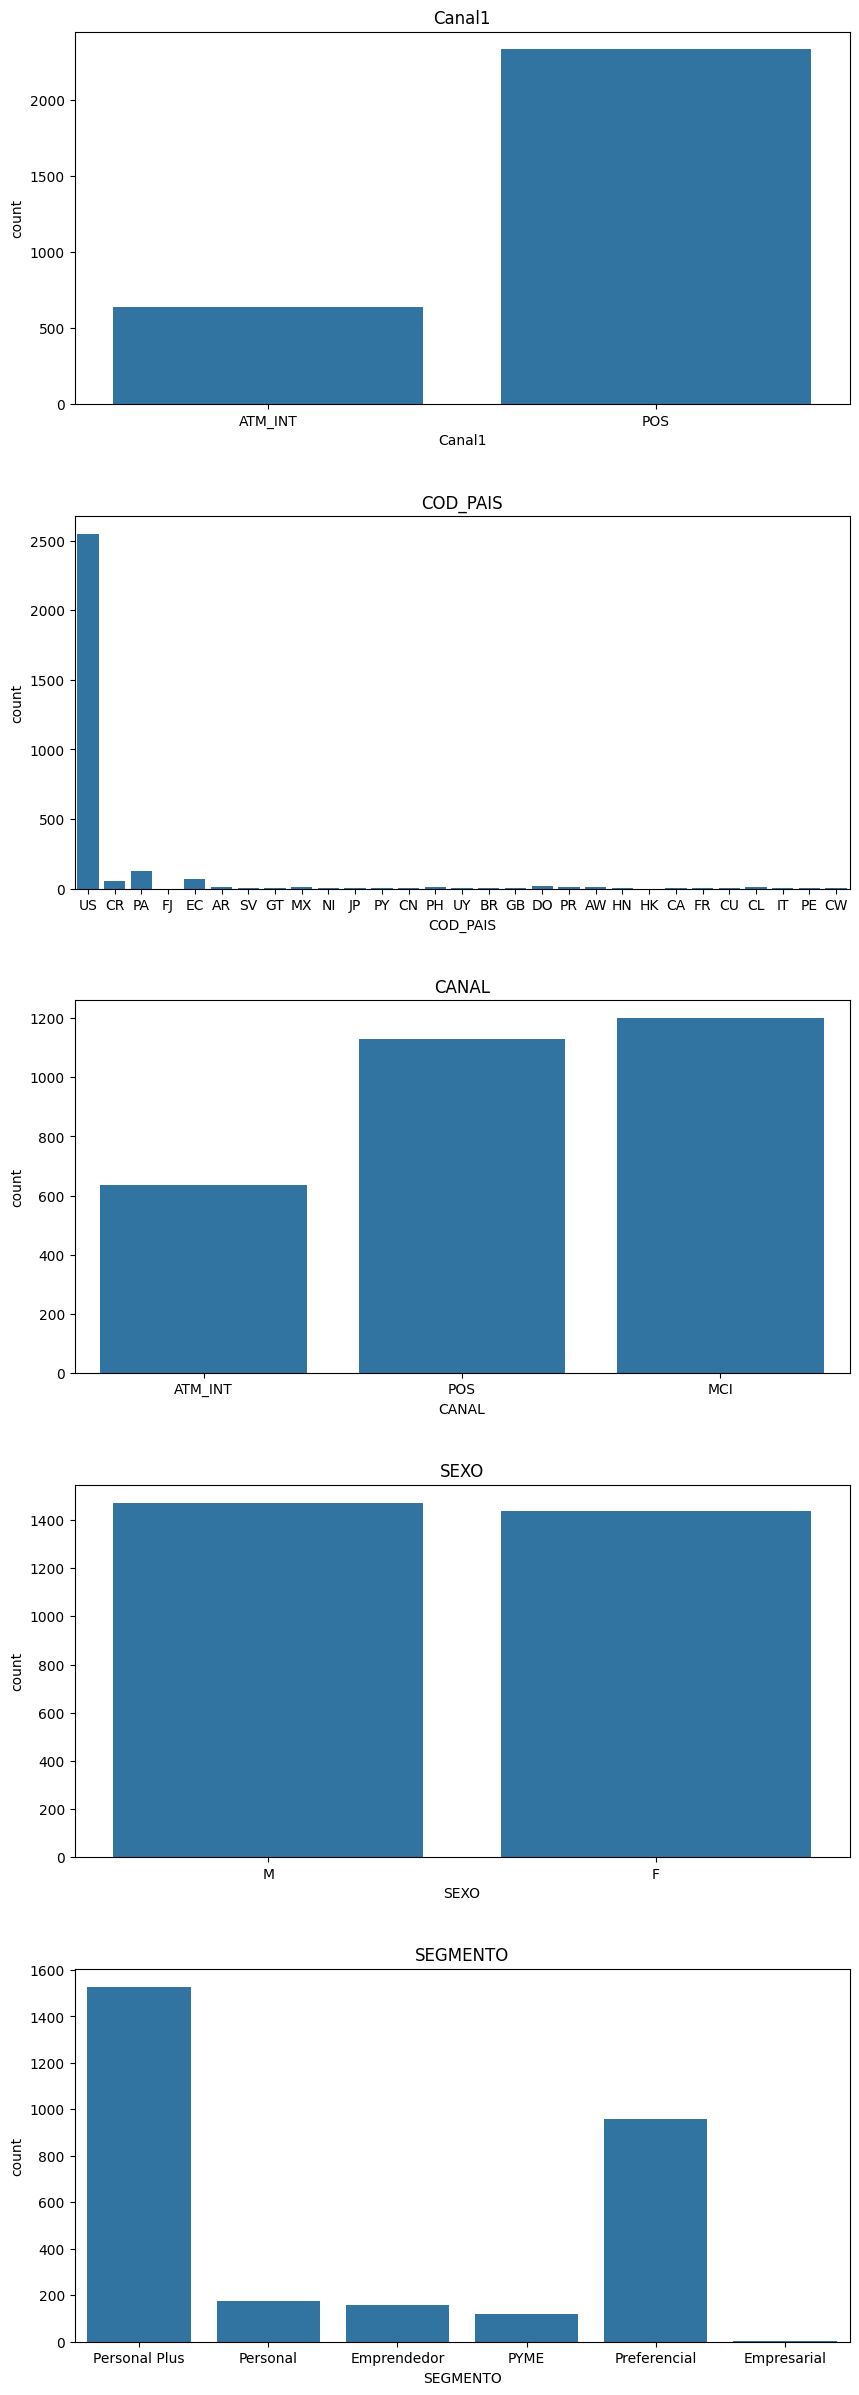

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=train_data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)

Descripción estadistica del dataframe train_data 

In [15]:
train_data.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2.965000e+03,2965.000000,2.965000e+03,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2.941000e+03,2941.000000,2941.000000,2.941000e+03,2.941000e+03,2965.000000,1418.000000,1418.000000,1418.000000,2965.000000,2508.000000,2965.000000,2965.000000
mean,6.890938e+09,0.246543,5.035695e+05,14.960877,314.656739,2.015051e+07,3.143002,13.492411,2.000920e+07,416.426386,40.010541,1.449104e+07,8.506309e+06,1.765936,17354.692891,4144.323540,4985.442313,3.943676,196.589282,4379.826287,1765.212887
std,9.739700e+09,0.431071,9.859497e+05,6.348607,295.142673,9.134641e+00,2.092284,9.134641,9.260427e+04,290.263484,12.976492,5.637311e+07,6.179161e+07,1.042219,25168.020649,1794.829357,2655.081718,2.750021,192.026206,1779.739070,2398.666844
min,2.364560e+06,0.000000,0.000000e+00,0.000000,1.000000,2.015050e+07,0.000000,1.000000,1.911111e+07,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,904.810000,904.810000,904.810000,1.000000,4.480000,0.000000,1.000000
25%,2.552997e+09,0.000000,9.016001e+04,12.000000,24.830000,2.015050e+07,1.000000,4.000000,1.995102e+07,168.000000,31.000000,2.500000e+06,5.000000e+05,1.000000,6474.200000,3178.210000,4552.410000,2.000000,60.800000,4552.410000,139.870000
50%,6.142884e+09,0.000000,2.435912e+05,16.000000,243.620000,2.015052e+07,3.000000,15.000000,2.001123e+07,360.000000,38.000000,5.800000e+06,1.800000e+06,1.000000,9104.820000,4552.410000,4552.410000,3.000000,127.700000,4552.410000,836.080000
75%,9.000000e+09,0.000000,5.058190e+05,20.000000,594.770000,2.015052e+07,5.000000,21.000000,2.008081e+07,659.000000,47.000000,1.274000e+07,4.500000e+06,2.000000,21376.445000,4552.410000,4552.410000,5.000000,269.082500,4552.410000,2533.440000
max,9.330050e+10,1.000000,2.001406e+07,23.000000,1310.460000,2.015053e+07,6.000000,31.000000,2.015043e+07,967.000000,133.000000,1.940070e+09,1.600000e+09,9.000000,758837.940000,16328.810000,17780.330000,20.000000,1217.570000,21991.200000,18832.060000


Busqueda de outliers por medio de diagrama de caja

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

In [22]:
train_data.columns

Index(['id', 'FRAUDE', 'VALOR', 'HORA_AUX', 'Dist_max_NAL', 'Canal1', 'FECHA',
       'COD_PAIS', 'CANAL', 'DIASEM', 'DIAMES', 'FECHA_VIN', 'OFICINA_VIN',
       'SEXO', 'SEGMENTO', 'EDAD', 'INGRESOS', 'EGRESOS', 'NROPAISES',
       'Dist_Sum_INTER', 'Dist_Mean_INTER', 'Dist_Max_INTER', 'NROCIUDADES',
       'Dist_Mean_NAL', 'Dist_HOY', 'Dist_sum_NAL'],
      dtype='object')

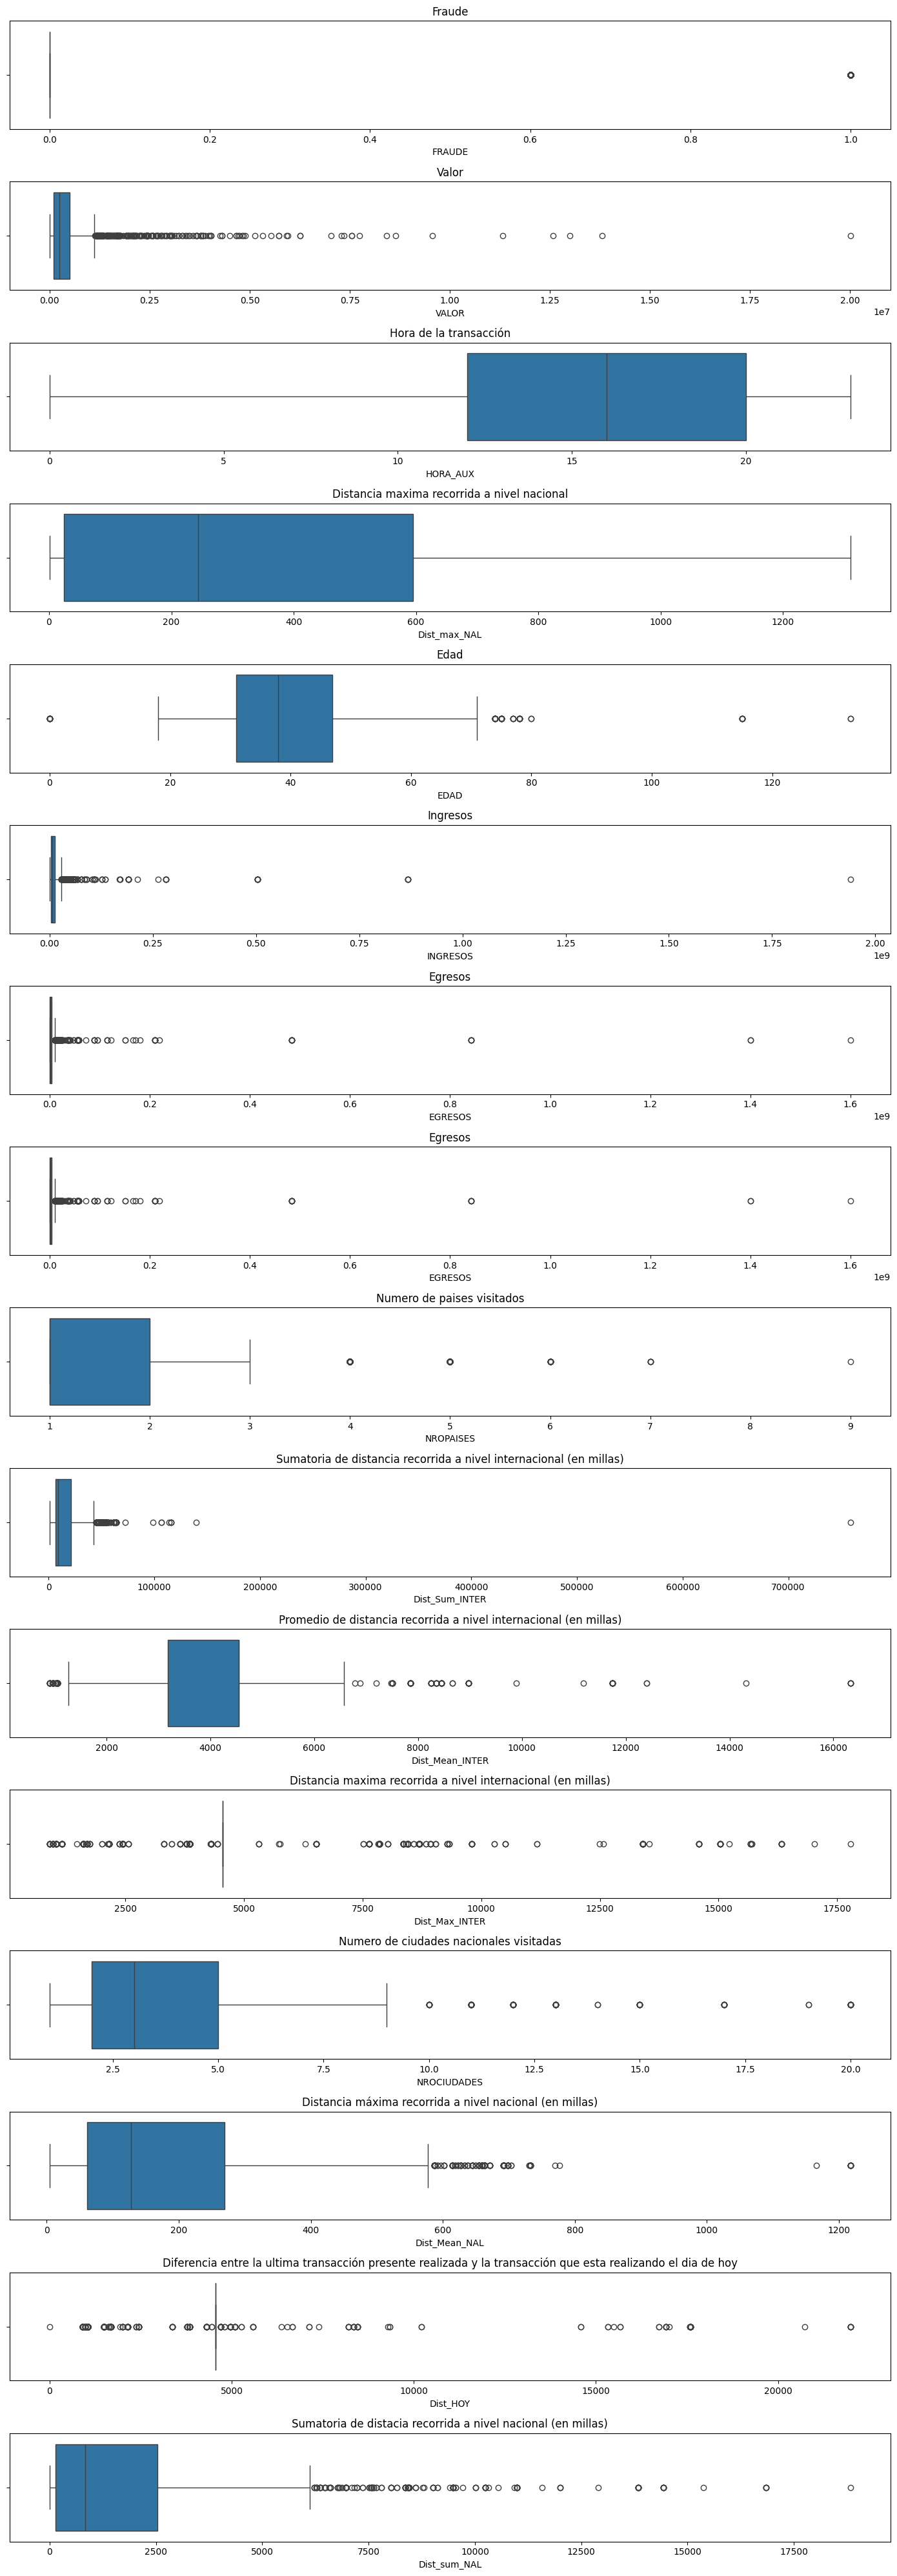

In [35]:
# Crear el boxplot
plt.figure(figsize=(14, 40))  # Ajusta el tamaño de la gráfica

# Boxplot para la Columna1
plt.subplot(16, 1, 1)
sns.boxplot(x='FRAUDE', data=train_data)
plt.title("Fraude")

# Boxplot para la Columna2
plt.subplot(16, 1, 2)
sns.boxplot(x='VALOR', data=train_data)
plt.title("Valor")

# Boxplot para la Columna3
plt.subplot(16, 1, 3)
sns.boxplot(x='HORA_AUX', data=train_data)
plt.title("Hora de la transacción")

# Boxplot para la Columna4
plt.subplot(16, 1, 4)
sns.boxplot(x='Dist_max_NAL', data=train_data)
plt.title("Distancia maxima recorrida a nivel nacional")

# Boxplot para la Columna5
plt.subplot(16, 1, 5)
sns.boxplot(x='EDAD', data=train_data)
plt.title("Edad")

# Boxplot para la Columna6
plt.subplot(16, 1, 6)
sns.boxplot(x='INGRESOS', data=train_data)
plt.title("Ingresos")

# Boxplot para la Columna7
plt.subplot(16, 1, 7)
sns.boxplot(x='EGRESOS', data=train_data)
plt.title("Egresos")

# Boxplot para la Columna8
plt.subplot(16, 1, 8)
sns.boxplot(x='EGRESOS', data=train_data)
plt.title("Egresos")

# Boxplot para la Columna9
plt.subplot(16, 1, 9)
sns.boxplot(x='NROPAISES', data=train_data)
plt.title("Numero de paises visitados")

# Boxplot para la Columna10
plt.subplot(16, 1, 10)
sns.boxplot(x='Dist_Sum_INTER', data=train_data)
plt.title("Sumatoria de distancia recorrida a nivel internacional (en millas)")

# Boxplot para la Columna11
plt.subplot(16, 1, 11)
sns.boxplot(x='Dist_Mean_INTER', data=train_data)
plt.title("Promedio de distancia recorrida a nivel internacional (en millas)")

# Boxplot para la Columna12
plt.subplot(16, 1, 12)
sns.boxplot(x='Dist_Max_INTER', data=train_data)
plt.title("Distancia maxima recorrida a nivel internacional (en millas)")

# Boxplot para la Columna13
plt.subplot(16, 1, 13)
sns.boxplot(x='NROCIUDADES', data=train_data)
plt.title("Numero de ciudades nacionales visitadas")

# Boxplot para la Columna14
plt.subplot(16, 1, 14)
sns.boxplot(x='Dist_Mean_NAL', data=train_data)
plt.title("Distancia máxima recorrida a nivel nacional (en millas)")

# Boxplot para la Columna15
plt.subplot(16, 1, 15)
sns.boxplot(x='Dist_HOY', data=train_data)
plt.title("Diferencia entre la ultima transacción presente realizada y la transacción que esta realizando el dia de hoy")

# Boxplot para la Columna16
plt.subplot(16, 1, 16)
sns.boxplot(x='Dist_sum_NAL', data=train_data)
plt.title("Sumatoria de distacia recorrida a nivel nacional (en millas)")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Eliminacion e imputacion de valores segun el porcentaje de nulos y la relevancia de la variable para el analisis

In [36]:
train_data = train_data.dropna(subset=['FECHA_VIN', 'OFICINA_VIN', 'SEGMENTO', 'INGRESOS', 'EGRESOS'])
train_data['EDAD'] = train_data['EDAD'].fillna(train_data['EDAD'].median())
train_data['SEXO'] = train_data['SEXO'].fillna(train_data['SEXO'].mode()[0])
train_data['Dist_Sum_INTER'] = train_data['Dist_Sum_INTER'].fillna(0)
train_data['Dist_Mean_INTER'] = train_data['Dist_Mean_INTER'].fillna(0)
train_data['Dist_Max_INTER'] = train_data['Dist_Max_INTER'].fillna(0)
train_data['Dist_Mean_NAL'] = train_data['Dist_Mean_NAL'].fillna(0)

C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\1449264375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['EDAD'] = train_data['EDAD'].fillna(train_data['EDAD'].median())
C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\1449264375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SEXO'] = train_data['SEXO'].fillna(train_data['SEXO'].mode()[0])
C:\Users\jaime\AppData\Local\Temp\ipykernel_3692\1449264375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [50]:
#Conteo de la cantidad de nulos por cada columna
regs=train_data.shape[0]
df_transform=train_data.copy()
for col in train_data.columns:
    vals=train_data[col].value_counts()
    values=vals.shape[0]
    nas=train_data[train_data[col].isna()].shape[0]
    porcentaje_na=nas*100/regs
    if porcentaje_na>=10:
        text=f'elimienando columna: {col}'
        df_transform.drop(columns={col},inplace=True)
    else:
        text=f'Quitando nulos de {col}'
        df_transform.dropna(subset=col,inplace=True)

    print(f'-variable {col} tiene {values} valores único, {nas} valores nulos ({nas*100/regs:.2f})%.')

-variable id tiene 2888 valores único, 0 valores nulos (0.00)%.
-variable FRAUDE tiene 2 valores único, 0 valores nulos (0.00)%.
-variable VALOR tiene 2259 valores único, 0 valores nulos (0.00)%.
-variable HORA_AUX tiene 24 valores único, 0 valores nulos (0.00)%.
-variable Dist_max_NAL tiene 264 valores único, 0 valores nulos (0.00)%.
-variable Canal1 tiene 2 valores único, 0 valores nulos (0.00)%.
-variable FECHA tiene 31 valores único, 0 valores nulos (0.00)%.
-variable COD_PAIS tiene 29 valores único, 0 valores nulos (0.00)%.
-variable CANAL tiene 3 valores único, 0 valores nulos (0.00)%.
-variable DIASEM tiene 7 valores único, 0 valores nulos (0.00)%.
-variable DIAMES tiene 31 valores único, 0 valores nulos (0.00)%.
-variable FECHA_VIN tiene 1025 valores único, 0 valores nulos (0.00)%.
-variable OFICINA_VIN tiene 373 valores único, 0 valores nulos (0.00)%.
-variable SEXO tiene 2 valores único, 0 valores nulos (0.00)%.
-variable SEGMENTO tiene 6 valores único, 0 valores nulos (0.00)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2941 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2941 non-null   int64  
 1   FRAUDE           2941 non-null   int64  
 2   VALOR            2941 non-null   float64
 3   HORA_AUX         2941 non-null   int64  
 4   Dist_max_NAL     2941 non-null   float64
 5   Canal1           2941 non-null   object 
 6   FECHA            2941 non-null   int64  
 7   COD_PAIS         2941 non-null   object 
 8   CANAL            2941 non-null   object 
 9   DIASEM           2941 non-null   int64  
 10  DIAMES           2941 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2941 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS          29

Entrenamiento del modelo    

In [40]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.2/11.0 MB 37.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 46.5 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/11.0 MB 55.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.5/11.0 MB 54.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 73.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 59.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ---------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


División en datos de entrenamiento, validacion y evaluación

In [41]:
from sklearn.model_selection import train_test_split

# Dividir el dataset de entrenamiento
X = train_data.drop('FRAUDE', axis=1)
y = train_data['FRAUDE']

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Contrucción del pipeline para el entranamiento y evalaución del modelo usando random forest y grid seach para la busqueda de los mejores hiperparametros

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, make_scorer

# Columnas categóricas
columnas_categoricas = ['Canal1', 'COD_PAIS', 'CANAL', 'SEXO', 'SEGMENTO']

# Preprocesamiento
preprocesamiento = ColumnTransformer(
    transformers=[
        # No preprocesamos las columnas numéricas
        ('categorico', Pipeline([   
            ('onehotencoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Codificación one-hot sin salida esparcida
        ]), columnas_categoricas)
    ],
    remainder='passthrough'  # Deja pasar las columnas no especificadas (en este caso, las numéricas)
)

# Pipeline con RandomForest
pipeline_rf = Pipeline([
    ('preprocesador', preprocesamiento),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Configuración de la malla de búsqueda (hiperparámetros para ajustar)
malla_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árboles
    'classifier__max_depth': [None, 10, 20],  # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'classifier__bootstrap': [True, False]  # Si utilizar o no bootstrap
}

# Crea el GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid=malla_rf, 
                       cv=5,  # Validación cruzada de 5
                       scoring={'accuracy': make_scorer(accuracy_score), 
                                'f1': make_scorer(f1_score)},  # Métricas de evaluación
                       refit='f1',  # Métrica principal para refit
                       return_train_score=True)

# Ajustar el modelo con GridSearch
grid_rf.fit(X_train, y_train)

# Mejores parámetros encontrados por GridSearch
print(f'Mejores Parametros: {grid_rf.best_params_}')


Mejores Parametros: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


Evaluación del modelo

In [53]:
from sklearn.metrics import accuracy_score, f1_score

# Predecir y evaluar en el conjunto de validación
y_pred = grid_rf.predict(X_val)

print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'F1-Score: {f1_score(y_val, y_pred)}')

Accuracy: 0.969439728353141
F1-Score: 0.9411764705882353


Generación del archivo de predicciones "predicciones_fraude.csv" 

In [60]:
# Predecir en el archivo de prueba
predicciones_test = grid_rf.predict(test_data)

# Guardar las predicciones
output = pd.DataFrame({'id': test_data['id'], 'FRAUDE': predicciones_test})
output.to_csv('predicciones_fraude.csv', index=False)

In [61]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matriz de confusión y comparación de las predicciones con los datos de validación

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


# Comparar y_pred (predicciones) y y_val (valores reales)
matriz_confusion = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Matriz de confusión:")
print(matriz_confusion)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Matriz de confusión:
[[427  10]
 [  8 144]]
Accuracy: 0.969439728353141
F1 Score: 0.9411764705882353
